In [6]:
with open("./weibo_train_data/weibo_train_data.txt",encoding='utf-8') as raw_data:
    raw_data = raw_data.readlines()

In [9]:
data = [a.split() for a in raw_data]

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

In [54]:
for d in range(len(data)):
    if len(data[d])<=7:
        print(raw_data[d])
        
data[1]

c81a36c59b9ca058d20f20534ae672a4	91eb215ac47461a36dfc60f5cecb534d	2015-04-27 09:46:30	0	0	1	 



['fa13974743d3fe6ff40d21b872325e9e',
 '8169f1d45051e08ef213bf1106b1225d',
 '2015-02-14',
 '12:49:58',
 '0',
 '0',
 '0',
 '#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵',
 '和@阚洪岩',
 '一起发出的现金红包，幸福感爆棚！情人节，一起来和粉丝红包约个会吧╮',
 '(￣',
 '3￣)',
 '╭http://t.cn/RZDIVjf']

In [76]:
data_dict = []
count = 0
for d in data:
    sample = {}
    
    sample['uid'] = str(d[0])
    sample['mid'] = str(d[1])
    sample['date'] = str(d[2])
    sample['time'] = str(d[3])
    sample['forward_count'] = int(d[4])
    sample['comment_count'] = int(d[5])
    sample['like_count'] = int(d[6])
    sample['content'] = ''
    if len(d) >= 8:
        for c in d[7]:
            sample['content'] = sample['content']+c
            sample['content'] = str(sample['content'])
    sample['hot'] = int(d[4])+int(d[5])+int(d[6])
    data_dict.append(sample)

In [77]:
data_df = pd.DataFrame.from_dict(data_dict)

In [78]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229618 entries, 0 to 1229617
Data columns (total 9 columns):
comment_count    1229618 non-null int64
content          1229618 non-null object
date             1229618 non-null object
forward_count    1229618 non-null int64
hot              1229618 non-null int64
like_count       1229618 non-null int64
mid              1229618 non-null object
time             1229618 non-null object
uid              1229618 non-null object
dtypes: int64(4), object(5)
memory usage: 84.4+ MB


In [79]:
data_df.content.describe()

count     1229618
unique     796034
top          分享图片
freq         8293
Name: content, dtype: object

In [242]:
data_df.loc[data_df.content=='分享图片'].describe()

,comment_count,forward_count,hot,like_count,hot_cat
count,8293.000000,8293.000000,8293.000000,8293.000000,8293.000000
mean,0.741107,0.364163,2.615941,1.510672,1.025805
std,5.913461,6.277071,37.860663,29.749757,0.183259
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000
max,230.000000,381.000000,1577.000000,1325.000000,4.000000


In [86]:
data_df.hot.describe()

count    1.229618e+06
mean     7.009461e+00
std      1.268746e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      5.531400e+04
Name: hot, dtype: float64

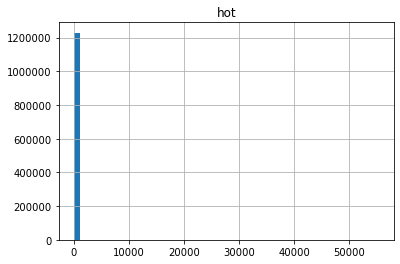

In [88]:
%matplotlib inline               #分布差距太大
import matplotlib.pyplot as plt
data_df.loc[data_df.hot = 500].hist('hot',bins=50)
plt.show()

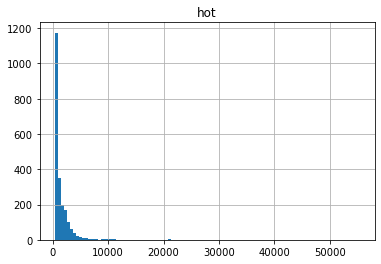

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
big_v.hist('hot',bins=100)
plt.show()

In [124]:
big_v = data_df.loc[data_df.hot > 400]

In [125]:
big_v.uid.describe()    #十倍最优

count                                 2203
unique                                 275
top       e88330514585dc40b7cb8f48c0e0ea2a
freq                                   433
Name: uid, dtype: object

In [126]:
mid_v = data_df.loc[data_df.hot <= 400].loc[data_df.hot > 100]

In [213]:
mid_v.uid.describe()  #十倍最优

count                                 9162
unique                                 901
top       ac4e754e41c3f328f1bf18c7fc381511
freq                                  1599
Name: uid, dtype: object

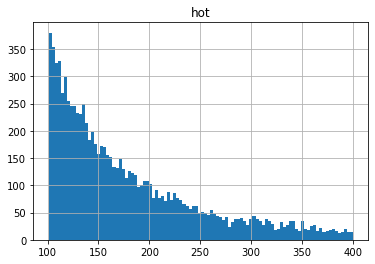

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
mid_v.hist('hot',bins=100)
plt.show()

In [129]:
s_v = data_df.loc[data_df.hot <= 100].loc[data_df.hot > 10]

In [130]:
s_v.uid.describe()   #十多倍

count                                83025
unique                                5706
top       97d783c2d3353568b472103bc0463d04
freq                                  1981
Name: uid, dtype: object

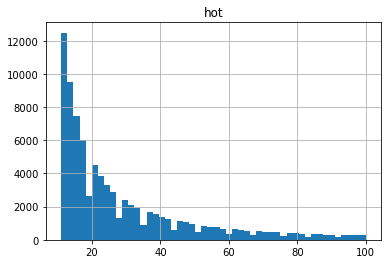

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt
s_v.hist('hot',bins=50)
plt.show()

In [133]:
v = data_df.loc[data_df.hot <= 10]
v.uid.describe()      #重复度很高 大概三十多倍

count                              1135228
unique                               37171
top       875a4a77b339d93f819e2c4de5bd0b57
freq                                 31114
Name: uid, dtype: object

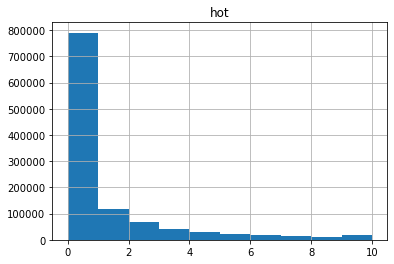

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
v.hist('hot',bins=10)
plt.show()

In [99]:
data_df.uid.describe()  #用户id作用很大，但是并不是连续的，且无法建模，可以作为先验知识

count                              1229618
unique                               37263
top       875a4a77b339d93f819e2c4de5bd0b57
freq                                 31116
Name: uid, dtype: object

In [139]:
data_df.loc[data_df['hot'] <= 10,'hot_cat'] = 1
data_df.loc[(data_df['hot'] <= 100) & (data_df['hot'] > 10),'hot_cat'] = 2  #筛选要用& 且索引要用()
data_df.loc[(data_df['hot'] <= 400) & (data_df['hot'] > 100),'hot_cat'] = 3
data_df.loc[data_df['hot'] > 400,'hot_cat'] = 4
data_df.head()

,comment_count,content,date,forward_count,hot,like_count,mid,time,uid,hot_cat
0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2015-02-23,0,0,0,7d45833d9865727a88b960b0603c19f6,17:41:29,d38e9bed5d98110dc2489d0d1cac3c2a,1.0
1,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵,2015-02-14,0,0,0,8169f1d45051e08ef213bf1106b1225d,12:49:58,fa13974743d3fe6ff40d21b872325e9e,1.0
2,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,2015-03-31,0,0,0,68cd0258c31c2c525f94febea2d9523b,13:58:06,da534fe87e7a52777bee5c30573ed5fd,1.0
3,4,看点不能说的，你们都懂[笑cry],2015-06-11,0,7,3,00b9f86b4915aedb7db943c54fd19d59,20:39:57,e06a22b7e065e559a1f0bf7841a85c51,1.0
4,0,111多张,2015-03-10,0,0,0,c7f6f66044c0c5a3330e2c5371be6824,18:02:38,f9828598f9664d4e347ef2048ce17734,1.0


In [141]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [143]:
for train_index, test_index in split.split(data_df,data_df['hot_cat']):
    strat_train_set = data_df.loc[train_index]
    strat_test_set = data_df.loc[test_index]

In [145]:
strat_train_set.hot_cat.value_counts() / len(strat_train_set)

1.0    0.923236
2.0    0.067521
3.0    0.007452
4.0    0.001791
Name: hot_cat, dtype: float64

In [146]:
data_df.hot_cat.value_counts() / len(data_df)

1.0    0.923236
2.0    0.067521
3.0    0.007451
4.0    0.001792
Name: hot_cat, dtype: float64

In [147]:
for set in (strat_train_set, strat_test_set):
    set.drop(["hot_cat"], axis=1, inplace=True)

In [190]:
d_df = strat_train_set.copy()

In [191]:
def cat(x):
    x = x.split('-')
    s = ''
    for i in x:
        if i != '2015':
            s+=i
    return int(s)
d_df.date = d_df.date.apply(cat) #这样也行

In [192]:
d_df.head()

,comment_count,content,date,forward_count,hot,like_count,mid,time,uid
7309,0,新年红包送不停！祝愿大家过个好年！[发红包][发红包],210,0,0,0,54a8cd1746494b16b1b80c2c112192ca,18:37:34,eef3fe17f7c9a4524beb38952c042e16
73324,0,有奖品这件事是要拿出来和大伙说说的，要不然心里堵得慌！我参加了活动“幸运大转盘,226,0,0,0,3e7bee15bab8b76f562361a6a1ace8ce,16:56:38,a17daedc528d1888fd56650a7cfdc616
446592,0,Debian,203,0,0,0,a37be0a004940cc8f6f405f416a09be3,23:02:00,b99899bd7657837aabc10e3f15198e8b
794512,1,【中国和德国的工业制造水平到底差多少年？】2015年6月6日，中国科学院中国现代化研究中心在...,612,6,7,0,6d94a6fdc523e76f010c0eb7ef46e5fd,16:30:03,fbdd34b9ba9c62dcd8ca0d7fac67fec1
151912,0,我分享了@富敏荣律师,213,0,0,0,ea16197356ace0e467a0524e062e60f0,23:03:00,4178028da14b69fab8b076755331fc6c


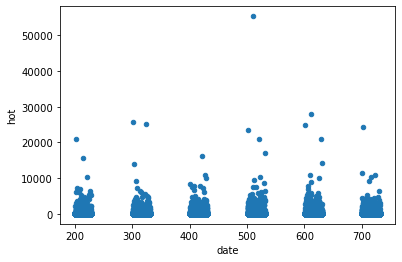

In [193]:
d_df.plot(kind='scatter',x = 'date',y = 'hot') #可以基本看出跟日期没什么关系 去掉日期

In [204]:
d_df = strat_train_set.copy()
d_df.drop(["date"], axis=1, inplace=True)
def cat(x):
    x = x.split(':')
    return int(x[0])
d_df.time = d_df.time.apply(cat) #这样也行
d_df.head()

,comment_count,content,forward_count,hot,like_count,mid,time,uid
7309,0,新年红包送不停！祝愿大家过个好年！[发红包][发红包],0,0,0,54a8cd1746494b16b1b80c2c112192ca,18,eef3fe17f7c9a4524beb38952c042e16
73324,0,有奖品这件事是要拿出来和大伙说说的，要不然心里堵得慌！我参加了活动“幸运大转盘,0,0,0,3e7bee15bab8b76f562361a6a1ace8ce,16,a17daedc528d1888fd56650a7cfdc616
446592,0,Debian,0,0,0,a37be0a004940cc8f6f405f416a09be3,23,b99899bd7657837aabc10e3f15198e8b
794512,1,【中国和德国的工业制造水平到底差多少年？】2015年6月6日，中国科学院中国现代化研究中心在...,6,7,0,6d94a6fdc523e76f010c0eb7ef46e5fd,16,fbdd34b9ba9c62dcd8ca0d7fac67fec1
151912,0,我分享了@富敏荣律师,0,0,0,ea16197356ace0e467a0524e062e60f0,23,4178028da14b69fab8b076755331fc6c


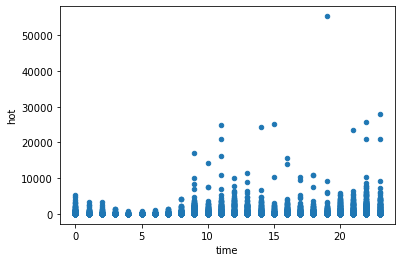

In [205]:
d_df.plot(kind='scatter',x = 'time',y = 'hot')  #基本在七八点才开始有高热度推文，跟时间的关系密切，可以单独建立模型

In [207]:
d_df.mid.describe()   #推文id是全局唯一的 用df的索引代替

count                               983694
unique                              983694
top       f03a10d0fa031fa6854b7306387b459a
freq                                     1
Name: mid, dtype: object

In [208]:
d_df.drop(["mid"], axis=1, inplace=True)

In [214]:
d_df.head()

,comment_count,content,forward_count,hot,like_count,time,uid
7309,0,新年红包送不停！祝愿大家过个好年！[发红包][发红包],0,0,0,18,eef3fe17f7c9a4524beb38952c042e16
73324,0,有奖品这件事是要拿出来和大伙说说的，要不然心里堵得慌！我参加了活动“幸运大转盘,0,0,0,16,a17daedc528d1888fd56650a7cfdc616
446592,0,Debian,0,0,0,23,b99899bd7657837aabc10e3f15198e8b
794512,1,【中国和德国的工业制造水平到底差多少年？】2015年6月6日，中国科学院中国现代化研究中心在...,6,7,0,16,fbdd34b9ba9c62dcd8ca0d7fac67fec1
151912,0,我分享了@富敏荣律师,0,0,0,23,4178028da14b69fab8b076755331fc6c


In [218]:
id_df = d_df.loc[:,['uid','comment_count','forward_count','like_count']]

In [232]:
id_df.to_csv('./data/train_id.csv')
id_df.head() #作为先验知识建模

,uid,comment_count,forward_count,like_count
7309,eef3fe17f7c9a4524beb38952c042e16,0,0,0
73324,a17daedc528d1888fd56650a7cfdc616,0,0,0
446592,b99899bd7657837aabc10e3f15198e8b,0,0,0
794512,fbdd34b9ba9c62dcd8ca0d7fac67fec1,1,6,0
151912,4178028da14b69fab8b076755331fc6c,0,0,0


In [222]:
time_df = d_df.loc[:,['time','comment_count','forward_count','like_count']]
time_df.head()

,time,comment_count,forward_count,like_count
7309,18,0,0,0
73324,16,0,0,0
446592,23,0,0,0
794512,16,1,6,0
151912,23,0,0,0


In [233]:
time_df.to_csv('./data/train_time.csv')

In [223]:
contend_df = d_df.loc[:,['content','comment_count','forward_count','like_count']]
contend_df.head()

,content,comment_count,forward_count,like_count
7309,新年红包送不停！祝愿大家过个好年！[发红包][发红包],0,0,0
73324,有奖品这件事是要拿出来和大伙说说的，要不然心里堵得慌！我参加了活动“幸运大转盘,0,0,0
446592,Debian,0,0,0
794512,【中国和德国的工业制造水平到底差多少年？】2015年6月6日，中国科学院中国现代化研究中心在...,1,6,0
151912,我分享了@富敏荣律师,0,0,0


In [235]:
contend_df.to_csv('./data/train_content.csv')

对验证集做同样操作

In [228]:
def cat_time(x):
    x = x.split(':')
    return int(x[0])
val_df = strat_test_set.copy()
val_df.drop(["date"], axis=1, inplace=True)
val_df.time = val_df.time.apply(cat)
val_id_df = val_df.loc[:,['uid','comment_count','forward_count','like_count']]
val_time_df = val_df.loc[:,['time','comment_count','forward_count','like_count']]
val_contend_df = val_df.loc[:,['content','comment_count','forward_count','like_count']]

In [236]:
val_id_df.head()
val_id_df.to_csv('./data/val_id.csv')

In [238]:
val_time_df.head()
val_time_df.to_csv('./data/val_time.csv')

In [239]:
val_contend_df.head()
val_contend_df.to_csv('./data/val_content.csv')